In [1]:
import pandas as pd

df = pd.read_csv("active_occ_licenses_2025.csv")

print(df.shape)
print(df.columns.tolist())
df.head()

(10896, 20)
['BusinessAddress', 'BusinessName', 'BusinessPhone', 'BusinessStartDate', 'BusinessType', 'BusinessLicenseNumber', 'City', 'OwnerName', 'State', 'StreetDirection', 'StreetName', 'StreetNumber', 'StreetSuffix', 'Suite', 'Zip', 'LocationX', 'LocationY', 'Latitude', 'Longitude', 'Location']


,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
0,4532 MAGAZINE ST,OCTAVIA ART AND FILM,504-616-6202,2008-03-14,Art Dealers,102680731,NEW ORLEANS,PAMELA M BRYAN,LA,NaN,MAGAZINE,4532,ST,NaN,70115-1543,3670385.57,518674.04,29.920506,-90.103601,POINT (-90.10360111114565 29.92050622841199)
1,24740 MILL VALLEY WAY,ALLOHN DESIGNS,NaN,2018-05-14,Special Events-Other (Vendor),105032410,CARSON,AGBENYA ALLOHN,CA,NaN,MILL VALLEY,24740,WAY,NaN,90745-6454,0.00,0.00,0.000000,0.000000,POINT (0 0)
2,2555 VALENCE ST,LOUANGER,(503) 867-6923,2025-02-01,Bed & Breakfast Inns,106124978,NEW ORLEANS,LOUANGER,LA,NaN,VALENCE,2555,ST,NaN,70115-6341,3669444.11,524212.50,29.935763,-90.106386,POINT (-90.10638567129016 29.935762975538836)
3,650 S ROCHEBLAVE ST,NOLA FROZEN TIME PHOTOGRAPHY,(504) 892-3220,2025-03-27,"Photography Studios, Portrait",106022854,NEW ORLEANS,NOLA FROZEN TIME PHOTOGRAPHY L,LA,S,ROCHEBLAVE,650,ST,NaN,70119-7439,3674709.28,532565.42,29.958575,-90.089477,POINT (-90.0894771646702 29.958574674015836)
4,3317 MAGAZINE ST,A VARGAS BODY SHOP,504-891-2606,1980-02-03,"Automotive Body, Paint & Interior Repair & Mai...",101117693,NEW ORLEANS,A VARGAS BODY SHOP INC,LA,NaN,MAGAZINE,3317,ST,NaN,70115-2410,3675193.08,519773.31,29.923386,-90.088388,POINT (-90.08838832801506 29.923386122945704)


## Inspecting 

In [2]:
df.info()
df.isnull().sum()
df.describe(include='all')
df.duplicated().sum()
df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10896 entries, 0 to 10895
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BusinessAddress        10896 non-null  object 
 1   BusinessName           8014 non-null   object 
 2   BusinessPhone          9594 non-null   object 
 3   BusinessStartDate      10896 non-null  object 
 4   BusinessType           10894 non-null  object 
 5   BusinessLicenseNumber  10896 non-null  int64  
 6   City                   10896 non-null  object 
 7   OwnerName              10896 non-null  object 
 8   State                  10896 non-null  object 
 9   StreetDirection        1382 non-null   object 
 10  StreetName             10855 non-null  object 
 11  StreetNumber           10858 non-null  object 
 12  StreetSuffix           10768 non-null  object 
 13  Suite                  1429 non-null   object 
 14  Zip                    10896 non-null  object 
 15  Lo

,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
76,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)


## Column Name Cleaning

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.rename(columns = {"businessname": "business_name", "businessstartdate": "business_start_date"})

df.columns

Index(['businessaddress', 'business_name', 'businessphone',
       'business_start_date', 'businesstype', 'businesslicensenumber', 'city',
       'ownername', 'state', 'streetdirection', 'streetname', 'streetnumber',
       'streetsuffix', 'suite', 'zip', 'locationx', 'locationy', 'latitude',
       'longitude', 'location'],
      dtype='object')

## Cleaning ZIP Codes

In [4]:
map_data = df.copy()

In [5]:
map_data['zip'] = (
    map_data['zip']
    .astype(str)
    .str.strip()
    .str.slice(0,5)
)
map_data = map_data[map_data['zip'].str.isnumeric()]

## Null & Duplicate Checks

Checking for null and duplicate values in key columns that are relevant to business identification and classification. These fields are important for analysis & may need further handling if missing data is found. 

In [6]:
df = df[df['business_name'].notnull()]

df[['business_name', 'suite']].isnull().sum()

duplicate_example = df[df['business_name'] == "NOLAVORE'S A LA CARTE MARKET"]
duplicate_example

,businessaddress,business_name,businessphone,business_start_date,businesstype,businesslicensenumber,city,ownername,state,streetdirection,streetname,streetnumber,streetsuffix,suite,zip,locationx,locationy,latitude,longitude,location
75,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)
76,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)
5488,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2024-01-01,Convenience Stores,105069380,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)


## Dropping Rows with Missing Name 

Rows that are missing 'business_name' were dropped, as this field is critical for identifying and grouping businesses in the dataset. The 'suit' column has a large number of values. Not all business have suites, these missing values are expected & will be kept. 

In [7]:
df[df['business_name'].isnull()].head()

,businessaddress,business_name,businessphone,business_start_date,businesstype,businesslicensenumber,city,ownername,state,streetdirection,streetname,streetnumber,streetsuffix,suite,zip,locationx,locationy,latitude,longitude,location


## Changing business_start_date to datetime

In [8]:
df = df.copy()
df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors='coerce')

## Extracting Year

In [9]:
df['business_start_year'] = df['business_start_date'].dt.year
df['business_start_year'].value_counts().sort_index()

business_start_year
1900      7
1937      1
1958      1
1962      1
1963      7
       ... 
2022    289
2023    372
2024    474
2025    839
2026      2
Name: count, Length: 68, dtype: int64

## Number of Businesses Starting Over the Years

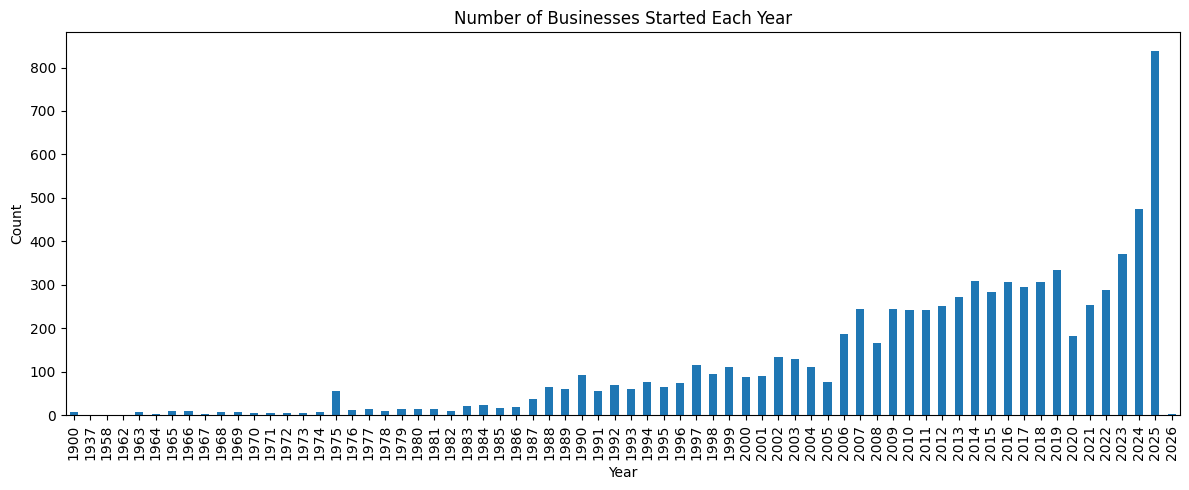

In [10]:
import matplotlib.pyplot as plt

df['business_start_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Number of Businesses Started Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Recent Years: (2000-2025)

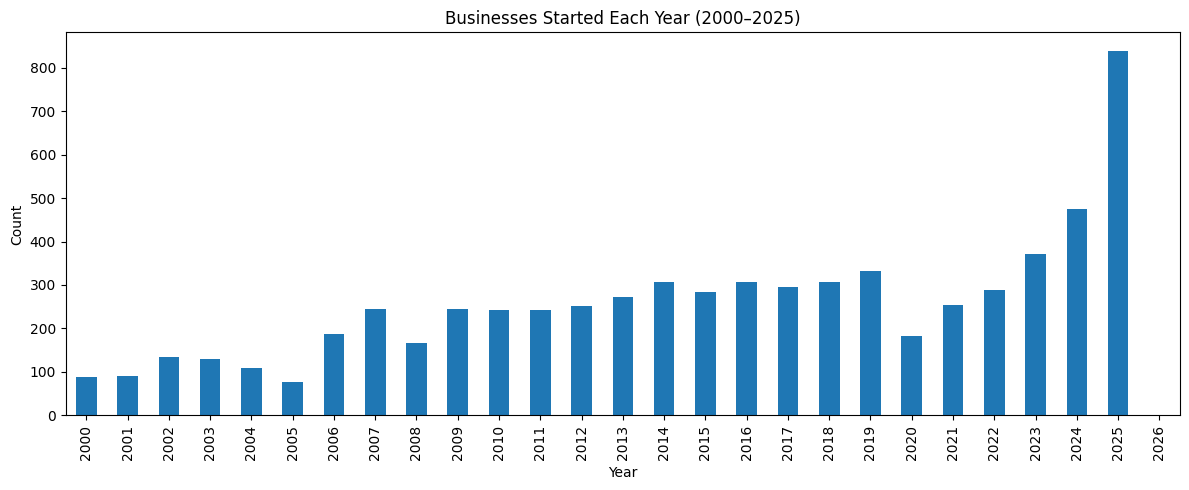

In [11]:
recent = df[df['business_start_year'] >= 2000]

recent['business_start_year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))

plt.title('Businesses Started Each Year (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("business_starts_trend.png")
plt.show()

In [12]:
plt.savefig("business_starts_trend.png")

<Figure size 640x480 with 0 Axes>

## Sample Column Values 

In [13]:
for col in df.columns:
    sample_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No data"
    print(f"- **{col}**: Example value → {sample_value}")

- **businessaddress**: Example value → 4532 MAGAZINE ST
- **business_name**: Example value → OCTAVIA ART AND FILM
- **businessphone**: Example value → 504-616-6202
- **business_start_date**: Example value → 2008-03-14 00:00:00
- **businesstype**: Example value → Art Dealers
- **businesslicensenumber**: Example value → 102680731
- **city**: Example value → NEW ORLEANS
- **ownername**: Example value → PAMELA M BRYAN
- **state**: Example value → LA
- **streetdirection**: Example value → S
- **streetname**: Example value → MAGAZINE
- **streetnumber**: Example value → 4532
- **streetsuffix**: Example value → ST
- **suite**: Example value → 102
- **zip**: Example value → 70115-1543
- **locationx**: Example value → 3670385.57
- **locationy**: Example value → 518674.04
- **latitude**: Example value → 29.92050622841199
- **longitude**: Example value → -90.10360111114564
- **location**: Example value → POINT (-90.10360111114565 29.92050622841199)
- **business_start_year**: Example value → 2008


## Understanding the Dataset Columns

To better interpet the dataseet, this section provides descriptions of each column along with a sample value. This helps clarify the structure of the data before performing any analysis or cleaning. 

### Column Description

- **BusinessAddress**: Full street address of the buisness
  location. _e.g., "4532 MAGAZINE ST"_

---

- **BusinessName**: Registered name of the business.
  _e.g., "OCTAVIA ART AND FILM"_

---

- **BusinessPhone**: Business contact number.
  _e.g., "504-616-6202"_

---

- **BusinessStartDate**: Official start date of business
  operations. _e.g., "2008-03-14"_

---

- **BusinessType**: Classification of the business activity or
  industry. _e.g., "Art Dealers"_

---

- **BusinessLicenseNumber**: Unique license ID assigned by the city. _e.g., "102680731"_

---

- **City**: City where the business is registered.
  _e.g., "NEW ORLEANS"_

---

- **OwnerName**: Full name of the business owner.
  _e.g., "PAMELA M BRYAN"_

---

- **State**: State abbreviation.
  _e.g., "LA"_

---

- **StreetDirection**: Compass direction used in the street address. _e.g., "S"_

---

- **StreetName**: Name of the street without number or direction.
 _e.g., "MAGAZINE"_

---

- **StreetNumber**: Number portion of the address.
  _e.g., "4532"_

---

- **StreetSuffix**: Type of road or street abbreviation.
  _e.g., "ST"_

---

- **Suite**: Internal office or suite number, if applicable.
  _e.g., "207"_

---

- **Zip**: ZIP code including any extended digits.
  _e.g., "70115-1543"_

---

- **LocationX / LocationY**: Internal coordinate reference system
  values.

---

- **Lattitude / Longitude**: Georgraphic location of the business.
  _e.g., (29.0205, -99.1036)

---

- **Location**: GIS-style point reference for mapping.
  _e.g., "POINT (-90.1036 29.9205)"_

## Business Trends by Year

Visualizing the number of new businesses registered each year providing insights into trends over time, including spikes/declines in activity. 

In [14]:
df['start_year'] = df['business_start_date'].dt.year

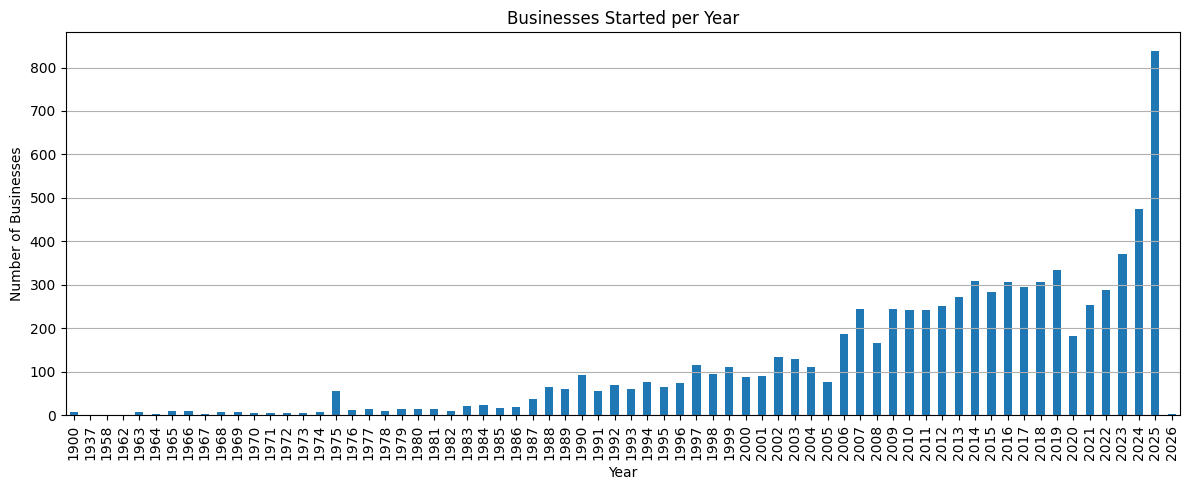

In [15]:
df['start_year'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(12,5), 
    title='Businesses Started per Year')
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Business Breakdown (Type/Zipcode)

In [16]:
df.columns
df['businesstype'].value_counts()

businesstype
Special Events-Other (Vendor)                                     857
Full Service Restaurants(table service available)                 776
Drinking Places(Alcoholic Beverages)                              346
Hotels(except Casino Hotels) & Motels                             221
Taxi Service                                                      210
                                                                 ... 
Process, Physical Distribution & Logistics Consulting Services      1
Specialized Freight(except Used) Trucking                           1
Solid Waste Collection                                              1
Drugs and Druggists' Sundries Wholesalers                           1
Navigational Services to Shipping                                   1
Name: count, Length: 416, dtype: int64

## Top 10 Most Common Business Types

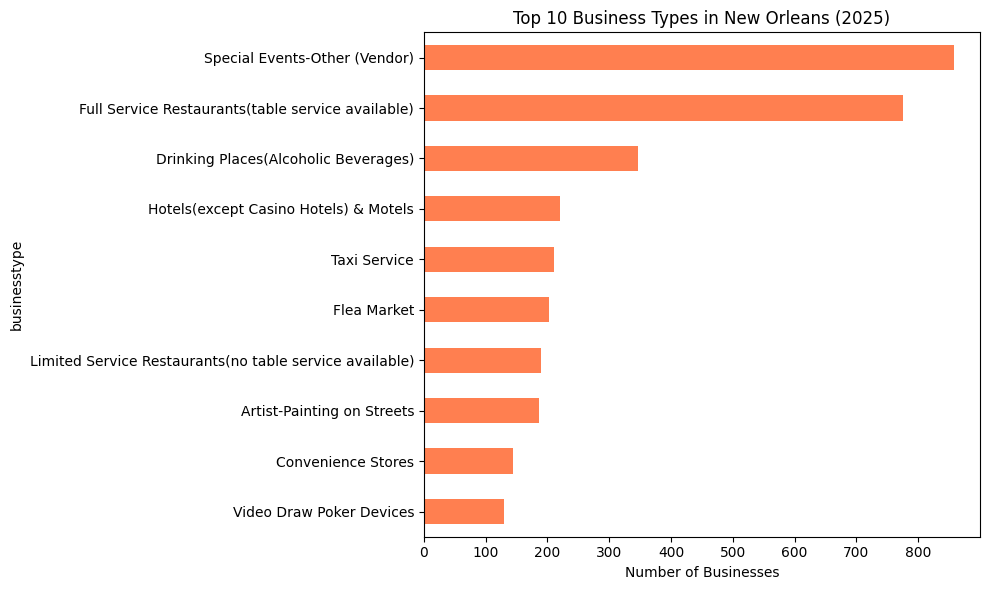

In [17]:
top_types = df['businesstype'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_types.plot(kind='barh', color='coral')
plt.xlabel('Number of Businesses')
plt.title('Top 10 Business Types in New Orleans (2025)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_business_types.png')
plt.show()

In [18]:
!pip install folium


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [19]:
import folium
test_map = folium.Map(location = [29.95, -90.07], zoom_start = 12)
test_map

In [20]:
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import MiniBatchKMeans
import numpy as np

## Business Density Map
This interactive map shows where businesses are located throughout New Orleans. Each point represents a real business, and the clusters were balanced so each major area of the city displays up to 20 businesses. Users can zoom in, explore different neighborhoods, and click on a marker to see details like the business name, address, and type. This map makes it easy to spot which parts of the city have higher concentrations of businesses. 

In [21]:
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster

map_data = df.dropna(subset = ['latitude', 'longitude']).copy()

# Coordinates
map_data['latitude'] = pd.to_numeric(map_data['latitude'], errors ='coerce')
map_data['longitude'] = pd.to_numeric(map_data['longitude'], errors ='coerce')
map_data = map_data.dropna(subset =['latitude', 'longitude']).copy()

# Junk Coordinates 
map_data = map_data[
    (map_data['latitude'].between(-90, 90)) &
    (map_data['longitude'].between(-180, 180)) &
    ~((map_data['latitude'] == 0) & (map_data['longitude'] == 0))
].copy()

# Bounding 
LAT_MIN, LAT_MAX = 29.85, 30.15
LON_MIN, LON_MAX = -90.25, -89.85

map_data = map_data[
    map_data['latitude'].between(LAT_MIN, LAT_MAX) &
    map_data['longitude'].between(LON_MIN, LON_MAX)
].copy()

print("Rows kept for mapping:", len(map_data))

# Clustering
NUM_REGIONS = 8
coords = map_data[['latitude', 'longitude']]

kmeans = KMeans(n_clusters = NUM_REGIONS, random_state = 42, n_init = 10)
map_data['region'] = kmeans.fit_predict(coords)

sampled_points = (
    map_data
        .groupby('region', group_keys = False)
        .apply(lambda g: g.sample(min(20, len(g)), random_state = 42))
        .reset_index(drop = True)
)

# Map
nola_map = folium.Map(
    location=[map_data['latitude'].mean(), map_data['longitude'].mean()],
    zoom_start = 11,
    tiles="OpenStreetMap"
)

cluster = MarkerCluster().add_to(nola_map)

for _, row in sampled_points.iterrows():
    popup_html = f"""
    <div style="font-size:14px; line-height:1.4;">
        <b>{row['business_name']}</b><br>
        Address: {row['businessaddress']}<br>
        Type: {row['businesstype']}<br>
        City: {row['city']}, {row['state']}<br>
        Zip Code: {str(row['zip'])[:5]}
    </div
    """

    folium.Marker(
        location = [row['latitude'], row['longitude']],
        popup = folium.Popup(popup_html, max_width = 300),
        tooltip = row['business_name']
    ).add_to(cluster)

nola_map

Rows kept for mapping: 6862


/var/folders/pj/46xggc511x36dn_yq6_mfb7w0000gn/T/ipykernel_63838/3388350342.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(20, len(g)), random_state = 42))


In [22]:
nola_map.save('business_density_map.html')

## Heatmap Layer of Businesses
This heatmap provides a quick visual overview of the areas in New Orleans with the most business activity. Warmer colors (green, yellow) show higher business concentration, while cooler colors (blue) represent areas with fewer businesses. This helps highlight busy commercial zones and regions with lighter activity at a glance. 

In [23]:
from folium.plugins import HeatMap

In [24]:
heat_data = (
    map_data[['latitude', 'longitude']]
    .dropna()
    .values
    .tolist()
)

heatmap_layer = HeatMap(
    heat_data,
    radius = 12,
    blur = 15,
    min_opacity = 0.4,
    max_zoom = 14
)

heatmap_layer.add_to(nola_map)
nola_map

In [25]:
nola_map.save('business_heatmap.html')

## Business Type by ZIP Code - Heatmap Summary
This heatmap shows where businesses are most concentrated across New Orleans. Warmer colors (yellow/red) mean more businesses are in that ZIP code, while cooler colors (blue/green) show fewer. Each ZIP code marker includes the ZIP, the most common business type there, and how many businesses are in that area. This makes it easy to see which neighborhoods have the most activity. 


In [26]:
df['zip_clean'] = df['zip'].astype(str).str.extract(r'(\d{5})')

df_valid = df[
    (df['latitude'].between(29.5, 30.2)) &
    (df['longitude'].between(-90.4, -89.6))
].copy()

zip_business_counts = (
    df_valid.groupby(['zip_clean', 'businesstype'])
            .size()
            .reset_index(name = 'count')
)

zip_top_business = zip_business_counts.loc[
    zip_business_counts.groupby('zip_clean')['count'].idxmax()
].reset_index(drop = True)

zip_centroids = (
    df_valid.groupby('zip_clean')[['latitude', 'longitude']]
            .mean()
            .reset_index()
)

zip_map_data = pd.merge(zip_top_business, zip_centroids, on = 'zip_clean', how = 'inner')

zip_map = folium.Map(
    location = [df_valid['latitude'].mean(), df_valid['longitude'].mean()],
    zoom_start = 11
)

heat_data = [
    [row['latitude'], row['longitude'], row['count']]
    for _, row in zip_map_data.iterrows()
]

HeatMap(heat_data, radius = 28, blur = 22, max_zoom = 13).add_to(zip_map)

for _, row in zip_map_data.iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        radius = 10,
        color = 'black',
        weight = 1,
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.8,
        popup = (
            f"<b>ZIP Code:</b> {row['zip_clean']}<br>"
            f"<b>Top Business Type:</b> {row['businesstype']}<br>"
            f"<b>Count:</b> {row['count']}"
        ),
        tooltip=f"{row['zip_clean']} – {row['businesstype']}"
    ).add_to(zip_map)


zip_map

In [27]:
zip_map.save("zip_map.html")

## Year-Over-Year Business Growth
Although this dataset includes business start dates going back to the early 1990s, the sharp changes after 2005 line up with New Orleans' post-Katrina recovery. The pre-Katrina years helped establish a normal baseline of business activity, while the noticeable dip in 2005 and the strong rise in the years that follow reflect the city's rebuilding phase, growth investments, and the long-term expansion of small businesses. This full timeline allows us to see not just the immediate impact of Katrina, but also how New Orleans' business landscape evolved and accelerated in the years after. 

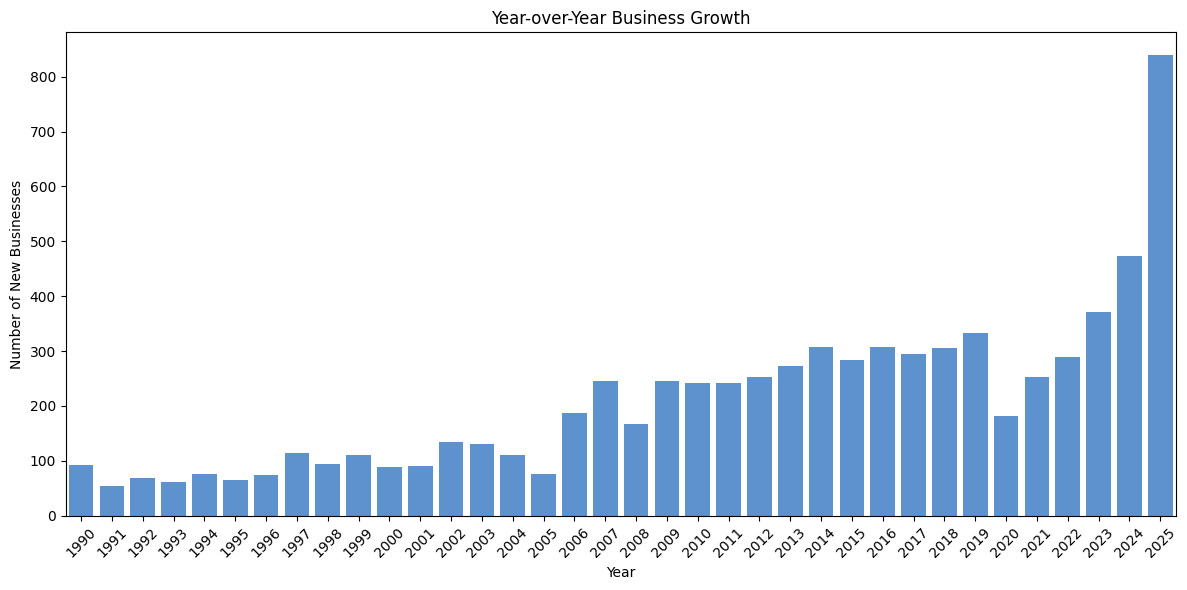

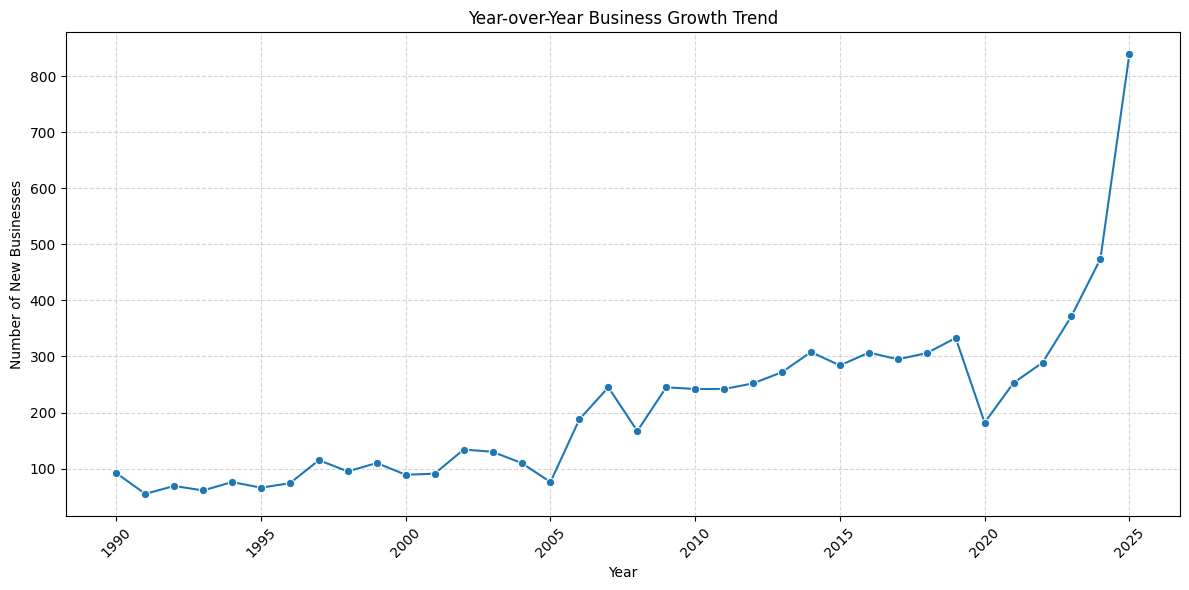

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors='coerce')

df['start_year'] = df['business_start_date'].dt.year

df_clean_years = df[(df['start_year'] >= 1990) & (df['start_year'] <= 2025)]

yoy_growth = df_clean_years.groupby('start_year').size().reset_index(name = 'business_count')

plt.figure(figsize = (12,6))
sns.barplot(data = yoy_growth, x = 'start_year', y = 'business_count', color = '#4a90e2')
plt.title("Year-over-Year Business Growth")
plt.xlabel("Year")
plt.ylabel("Number of New Businesses")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,6))
sns.lineplot(data = yoy_growth, x = 'start_year', y = 'business_count', marker = 'o')
plt.title("Year-over-Year Business Growth Trend")
plt.xlabel("Year")
plt.ylabel("Number of New Businesses")
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

## Most Common Business Types in the Last Quarter of the Year 
This analysis examines the most common business license types issued in New Orleans during the last quarter of the year (October through December). By grouping newly issued licenses by business category and ranking them by frequency, the results highlight which sectors were most active toward year-end. The findings suggest increased activity in service-oriented and consumer-facing businesses, which may reflect seasonal demand, holiday-related commerce, and preparation for the upcoming year. 

In [29]:
# Checking Range/Records

print("Min start date:", df["business_start_date"].min())
print("Max start date:", df["business_start_date"].max())

year_counts = df["business_start_date"].dt.year.value_counts().sort_index()
display(year_counts.tail(15))


q4_all = df[df["business_start_date"].dt.month.isin([10,11,12])].copy()
print("Total Q4 records (all years):", len(q4_all))


q4_by_year = q4_all["business_start_date"].dt.year.value_counts().sort_index()
display(q4_by_year.tail(15))

Min start date: 1900-01-02 00:00:00
Max start date: 2026-03-01 00:00:00


business_start_date
2012    252
2013    272
2014    308
2015    284
2016    307
2017    295
2018    306
2019    333
2020    182
2021    253
2022    289
2023    372
2024    474
2025    839
2026      2
Name: count, dtype: int64

Total Q4 records (all years): 1385


business_start_date
2011     47
2012     59
2013     61
2014     85
2015     61
2016     66
2017     61
2018     78
2019     14
2020      3
2021     11
2022      8
2023     22
2024    106
2025      1
Name: count, dtype: int64

## Top 15 Business Types Q4 Chart
This chart highlights the most frequently issued business license categories during Q4 2024, giving insight into year-end economic activity in New Orleans. 

In [30]:
import os
os.makedirs("images", exist_ok = True)

Chosen year for Q4 analysis: 2024
Q4 records (Oct–Dec) in 2024: 106


businesstype
Special Events-Other (Vendor)                                         23
Full Service Restaurants(table service available)                     18
Flea Market                                                            8
Taxi Service                                                           5
Art Dealers                                                            4
Hotels(except Casino Hotels) & Motels                                  3
Limited Service Restaurants(no table service available)                3
Personal Care Services, Other                                          3
Administrative Management & General Management Consulting Services     2
Drinking Places(Alcoholic Beverages)                                   2
Bed & Breakfast Inns                                                   2
Social Advocacy Organizations, Other                                   2
Lessors of Residential Bulidings & Dwellings                           2
Artist-Painting on Streets            

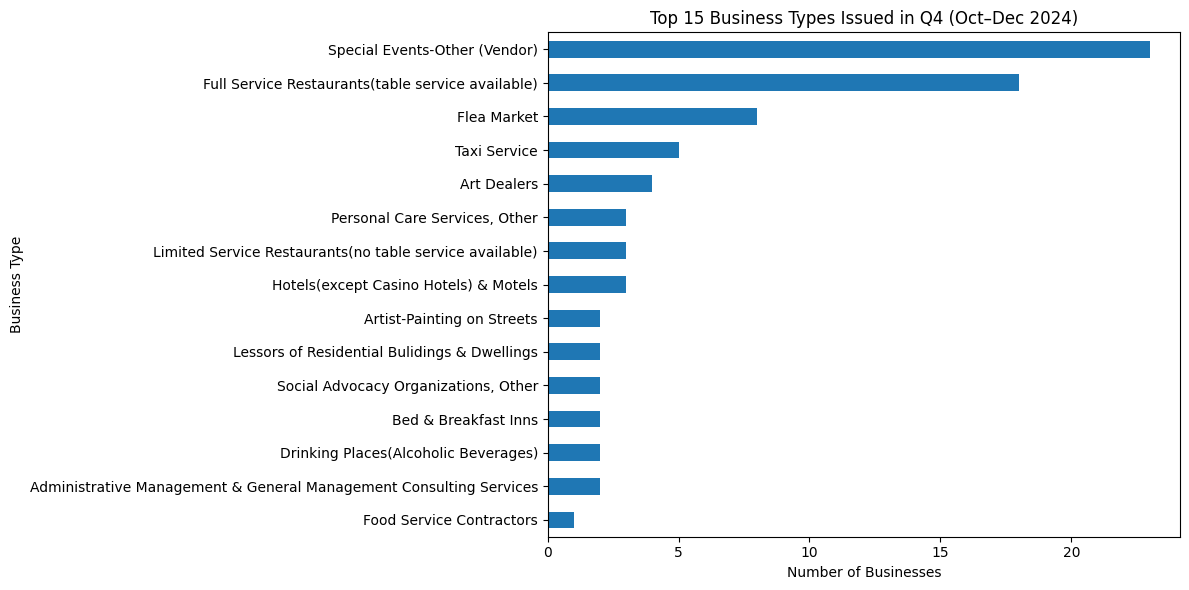

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


TOP_N = 15
MIN_Q4_RECORDS = 50   


df = df.copy()
df["business_start_date"] = pd.to_datetime(df["business_start_date"], errors="coerce")

# Invalid Dates
df.loc[df["business_start_date"] < pd.Timestamp("2000-01-01"), "business_start_date"] = pd.NaT

#Q4 Subset
q4 = df[df["business_start_date"].dt.month.isin([10, 11, 12])].copy()
q4["year"] = q4["business_start_date"].dt.year

# Recent Q4 Dates
q4_year_counts = q4["year"].value_counts().sort_index()
eligible_years = q4_year_counts[q4_year_counts >= MIN_Q4_RECORDS]

if eligible_years.empty:
    print("No year meets MIN_Q4_RECORDS. Lower MIN_Q4_RECORDS or inspect q4_year_counts:")
    display(q4_year_counts.tail(25))
else:
    chosen_year = int(eligible_years.index.max())
    q4_chosen = q4[q4["year"] == chosen_year].copy()

    type_counts = (
        q4_chosen["businesstype"]
        .dropna()
        .astype(str)
        .str.strip()
        .replace("", pd.NA)
        .dropna()
        .value_counts()
    )

    top_types = type_counts.head(TOP_N)

    print(f"Chosen year for Q4 analysis: {chosen_year}")
    print(f"Q4 records (Oct–Dec) in {chosen_year}: {len(q4_chosen):,}")
    display(top_types)

    # Plot
    top_types.sort_values().plot(
        kind="barh",
        figsize = (12, 6),
        title = f"Top 15 Business Types Issued in Q4 (Oct–Dec {chosen_year})"

    )
    plt.xlabel("Number of Businesses")
    plt.ylabel("Business Type")
    plt.tight_layout()
    plt.savefig("images/top_15_business_types_q4_2024.png", dpi = 300, bbox_inches = "tight")
    plt.show()